In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, RidgeCV, RidgeClassifier
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('/content/drive/MyDrive/28. 20220126_DAY27(1주차 모의경진대회)/data/train.csv')
df.head(5)

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1200,1200.0,0.0,1,18,37.74,0.076,0.0,0.0,157.94,765,769,0
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,8000,8000.0,0.0,1,8,269.52,0.447,0.0,0.0,1702.42,665,669,0
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5000,5000.0,0.0,1,7,168.45,0.880,0.0,0.0,1066.64,670,674,0
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,15000,15000.0,0.0,1,12,510.27,0.457,0.0,0.0,1256.24,680,684,1
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,10000,10000.0,0.0,1,8,335.45,0.416,0.0,0.0,871.04,660,664,1


In [4]:
X = df.drop('depvar', axis=1)
y = df['depvar']

In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1)

In [5]:
# LGBM1
lgbm_clf_1 = LGBMClassifier(boosting_type='dart',
                          eta=0.05,
                          max_depth = 8,
                          min_child_weight=0.001,
                          n_estimators =350,
                          num_leaves =72,
                          min_child_samples=27,

                          eval_metric='logloss',
                          objective= 'binary' ,


                          reg_alpha=0.1,
                          #   gamma=lgbm_clf_results.best_params_['gamma'],
                          reg_lambda=0.9,
                          is_unbalance=True,

                          tree_method='gpu_hist',
                          gpu_id=0,
                          seed=42,
                          )


In [6]:
# LGBM2
lgbm_clf_2 = LGBMClassifier(boosting_type='dart',
                          eta=0.05,
                          max_depth = 8,
                          min_child_weight=0.001,
                          n_estimators =350,
                          num_leaves =72,
                          min_child_samples=27,

                          eval_metric='logloss',
                          objective= 'binary' ,


                          reg_alpha=0.1,
                          #   gamma=lgbm_clf_results.best_params_['gamma'],
                          reg_lambda=0.9,
                          is_unbalance=True,

                          tree_method='gpu_hist',
                          gpu_id=0,
                          seed=43,
                          )


In [7]:
# LGBM3
lgbm_clf_3 = LGBMClassifier(boosting_type='dart',
                          eta=0.05,
                          max_depth = 8,
                          min_child_weight=0.001,
                          n_estimators =350,
                          num_leaves =72,
                          min_child_samples=27,

                          eval_metric='logloss',
                          objective= 'binary' ,


                          reg_alpha=0.1,
                          #   gamma=lgbm_clf_results.best_params_['gamma'],
                          reg_lambda=0.9,
                          is_unbalance=True,

                          tree_method='gpu_hist',
                          gpu_id=0,
                          seed=44,
                          )

In [8]:
# LGBM4
lgbm_clf_4 = LGBMClassifier(boosting_type='dart',
                          eta=0.05,
                          max_depth = 8,
                          min_child_weight=0.001,
                          n_estimators =350,
                          num_leaves =72,
                          min_child_samples=27,

                          eval_metric='logloss',
                          objective= 'binary' ,


                          reg_alpha=0.1,
                          #   gamma=lgbm_clf_results.best_params_['gamma'],
                          reg_lambda=0.9,
                          is_unbalance=True,

                          tree_method='gpu_hist',
                          gpu_id=0,
                          seed=45,
                          )

In [9]:
# LGBM5
lgbm_clf_5 = LGBMClassifier(boosting_type='dart',
                          eta=0.05,
                          max_depth = 8,
                          min_child_weight=0.001,
                          n_estimators =350,
                          num_leaves =72,
                          min_child_samples=27,

                          eval_metric='logloss',
                          objective= 'binary' ,


                          reg_alpha=0.1,
                          #   gamma=lgbm_clf_results.best_params_['gamma'],
                          reg_lambda=0.9,
                          is_unbalance=True,

                          tree_method='gpu_hist',
                          gpu_id=0,
                          seed=46,
                          )

In [10]:
# 평가 함수 정의
def get_clf_eval(y_actual, y_pred):
    accuracy = accuracy_score(y_actual, y_pred)
    precision = precision_score(y_actual, y_pred)
    recall = recall_score(y_actual, y_pred)
    AUC = roc_auc_score(y_actual, y_pred)
    F1 = f1_score(y_actual, y_pred, average='macro')
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('AUC: {:.4f}'.format(AUC))
    print('F1: {:.4f}'.format(F1))
    
    sns.heatmap(confusion_matrix(y_actual, y_pred), annot=True, fmt='d', cmap='YlGnBu')

In [13]:
# stacking

stacking_clf = StackingClassifier(estimators=[('lgbm1', lgbm_clf_1), ('lgbm2', lgbm_clf_2), ('lgbm3', lgbm_clf_3), ('lgbm4', lgbm_clf_4), ('lgbm5', lgbm_clf_5)], final_estimator = lgbm_clf_1)
stacking_clf.fit(X_train, y_train)
# y_pred_stack = stacking_clf.pred_prob(X_valid)
y_pred_stack = stacking_clf.predict(X_valid)





정확도: 0.7292
정밀도: 0.5624
재현율: 0.7619
AUC: 0.7376
F1: 0.7137


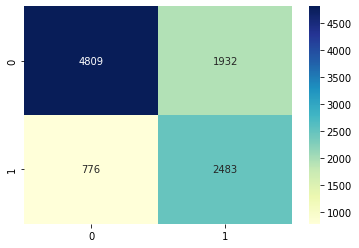

In [14]:
# ensemble(stacking) 성능 확인
get_clf_eval(y_valid, y_pred_stack)


정확도: 0.7507
정밀도: 0.6024
재현율: 0.6916
AUC: 0.7354
F1: 0.7261


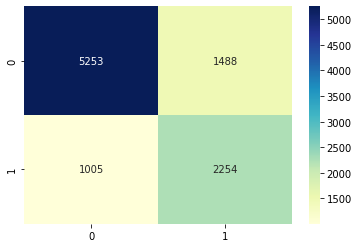

In [44]:
# threshold 변경 및 성능 확인
y_pred_stack_prob = stacking_clf.predict_proba(X_valid)[:, 1] > 0.56885



get_clf_eval(y_valid, y_pred_stack_prob)

In [45]:
# 제출 양식 다운로드
submit = pd.read_csv('/content/drive/MyDrive/28. 20220126_DAY27(1주차 모의경진대회)/data/sample_submission.csv')
submit.head()

,ID,answer
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [46]:
# prediction 수행
df_test = pd.read_csv('/content/drive/MyDrive/28. 20220126_DAY27(1주차 모의경진대회)/data/test.csv')
submit['answer'] = (stacking_clf.predict_proba(df_test.drop(columns=['ID']))[:,1] > 0.56885) * 1

submit.head(20)

,ID,answer
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
5,5,0
6,6,1
7,7,1
8,8,0
9,9,1


In [47]:

# 제출 파일 저장
submit.to_csv('/content/drive/MyDrive/prediction31.csv', index=False)